In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
np.__version__,tf.__version__

('2.0.2', '2.19.0')

In [ ]:
import tempfile
import zipfile

temp_dir = tempfile.TemporaryDirectory()
print(temp_dir)

<TemporaryDirectory '/tmp/tmp67uf9tnl'>


In [ ]:
with zipfile.ZipFile('dataset.zip', 'r') as zip:
  zip.extractall(temp_dir.name)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D,Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
classificador = Sequential()
classificador.add(InputLayer(shape = (64,64,3)))

classificador.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units=1, activation='sigmoid'))



In [ ]:
classificador.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,985 (3.17 MB)

 Trainable params: 829,857 (3.17 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255 ,rotation_range=7,horizontal_flip=True,shear_range=0.2,height_shift_range=0.07,zoom_range=0.2)

In [ ]:
gerador_teste = ImageDataGenerator(rescale = 1./255)

In [ ]:
base_treinamento = gerador_treinamento.flow_from_directory(f'{temp_dir.name}/dataset/training_set',target_size = (64,64),batch_size = 32,class_mode = 'binary')

Found 4000 images belonging to 2 classes.


In [ ]:
base_teste = gerador_teste.flow_from_directory(f'{temp_dir.name}/dataset/test_set',target_size = (64,64),batch_size = 32,class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [ ]:
classificador.fit(base_treinamento, epochs = 20, validation_data = base_teste)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 335ms/step - accuracy: 0.7676 - loss: 0.4651 - val_accuracy: 0.7610 - val_loss: 0.5179
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 350ms/step - accuracy: 0.7766 - loss: 0.4554 - val_accuracy: 0.7230 - val_loss: 0.6393
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 325ms/step - accuracy: 0.7827 - loss: 0.4599 - val_accuracy: 0.7470 - val_loss: 0.5072
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 344ms/step - accuracy: 0.7883 - loss: 0.4355 - val_accuracy: 0.6970 - val_loss: 0.5619
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 344ms/step - accuracy: 0.8049 - loss: 0.4230 - val_accuracy: 0.7590 - val_loss: 0.4986
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 349ms/step - accuracy: 0.8013 - loss: 0.4108 - val_accuracy: 0.7450 - val_loss: 0.5249
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - accuracy: 0.8068 - loss: 0.4079 - val_accuracy: 0.6960 - val_loss: 0.6898
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 339ms/step - accuracy: 0.8305 - loss: 0

In [ ]:
imagem_teste = image.load_img(f'{temp_dir.name}/dataset/test_set/cachorro/dog.3558.jpg', target_size=(64,64))

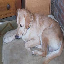

In [ ]:
imagem_teste

In [ ]:
imagem_teste = image.img_to_array(imagem_teste)

In [ ]:
imagem_teste

array([[[139., 141., 138.],
        [142., 144., 141.],
        [159., 161., 158.],
        ...,
        [204., 200., 191.],
        [209., 204., 200.],
        [208., 203., 200.]],

       [[153., 153., 161.],
        [144., 144., 152.],
        [155., 155., 163.],
        ...,
        [204., 200., 191.],
        [209., 204., 200.],
        [208., 203., 200.]],

       [[145., 146., 151.],
        [160., 161., 166.],
        [133., 134., 139.],
        ...,
        [204., 200., 191.],
        [207., 202., 198.],
        [205., 200., 197.]],

       ...,

       [[ 87.,  90.,  95.],
        [ 97., 100., 105.],
        [ 90.,  93.,  98.],
        ...,
        [147., 142., 139.],
        [112., 104., 101.],
        [ 90.,  82.,  71.]],

       [[ 90.,  93., 102.],
        [ 75.,  78.,  85.],
        [ 55.,  58.,  63.],
        ...,
        [146., 140., 142.],
        [111., 105., 107.],
        [116., 109., 101.]],

       [[ 79.,  81.,  93.],
        [ 71.,  74.,  83.],
        [ 56.,  

In [ ]:
imagem_teste /= 255

In [ ]:
imagem_teste

array([[[0.54509807, 0.5529412 , 0.5411765 ],
        [0.5568628 , 0.5647059 , 0.5529412 ],
        [0.62352943, 0.6313726 , 0.61960787],
        ...,
        [0.8       , 0.78431374, 0.7490196 ],
        [0.81960785, 0.8       , 0.78431374],
        [0.8156863 , 0.79607844, 0.78431374]],

       [[0.6       , 0.6       , 0.6313726 ],
        [0.5647059 , 0.5647059 , 0.59607846],
        [0.60784316, 0.60784316, 0.6392157 ],
        ...,
        [0.8       , 0.78431374, 0.7490196 ],
        [0.81960785, 0.8       , 0.78431374],
        [0.8156863 , 0.79607844, 0.78431374]],

       [[0.5686275 , 0.57254905, 0.5921569 ],
        [0.627451  , 0.6313726 , 0.6509804 ],
        [0.52156866, 0.5254902 , 0.54509807],
        ...,
        [0.8       , 0.78431374, 0.7490196 ],
        [0.8117647 , 0.7921569 , 0.7764706 ],
        [0.8039216 , 0.78431374, 0.77254903]],

       ...,

       [[0.34117648, 0.3529412 , 0.37254903],
        [0.38039216, 0.39215687, 0.4117647 ],
        [0.3529412 , 0

In [ ]:
imagem_teste.shape

(64, 64, 3)

In [ ]:
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

In [ ]:
imagem_teste.shape

(1, 64, 64, 3)

In [ ]:
previsao = classificador.predict(imagem_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
previsao

array([[0.724394]], dtype=float32)

In [ ]:
previsao = previsao > 0.5

In [ ]:
previsao

array([[ True]])

In [ ]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}